In [79]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
import numpy as np

In [80]:
class Data(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y

In [82]:
import pickle
pkl_train=open("train.pkl","rb")
pkl_test=open("test.pkl","rb")
train=pickle.load(pkl_train)
test=pickle.load(pkl_test)
print(train.x.shape,train.y.shape)
print(test.x.shape,test.y.shape)

(1031, 64, 64, 3) (1031,)
(340, 64, 64, 3) (340,)


In [177]:
st_net=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,kernel_size=5,padding="same",activation="relu",input_shape=[64,64,3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters=16,kernel_size=5,activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])

In [178]:
st_net.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
st_net=tf.keras.models.load_model('ST_recognizer_model.h5')
st_net.fit(train.x,train.y,epochs=1)
st_net.evaluate(test.x,test.y,verbose=2)

33/33 [==============================] - 1s 37ms/step - loss: 0.1300 - accuracy: 0.9583
11/11 - 0s - loss: 1.4607 - accuracy: 0.6412


[1.4607499837875366, 0.6411764621734619]

In [50]:
st_net.save('ST_recognizer_model.h5')

In [78]:
model=tf.keras.models.load_model('ST_recognizer_model.h5')
#model.summary()
#print(test.y.shape)
model.evaluate(test.x,test.y,verbose=2)
model.evaluate(train.x,train.y,verbose=2)

11/11 - 0s - loss: 0.5516 - accuracy: 0.8500
3/3 - 0s - loss: 2.8359 - accuracy: 0.3600


[2.835940361022949, 0.36000001430511475]

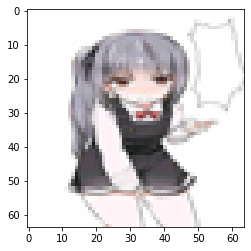

0.9995776


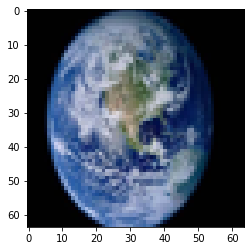

0.9982816


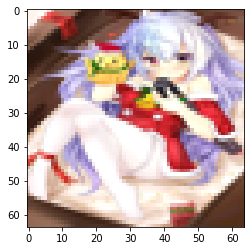

0.92806125


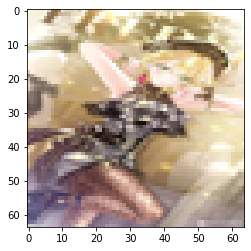

0.96614957


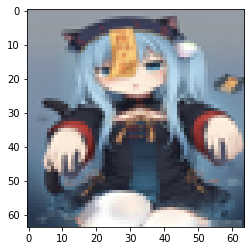

0.99962866


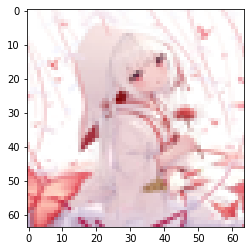

0.99913967


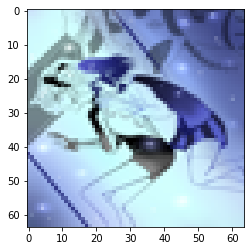

0.9941999


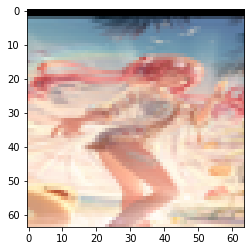

0.99834573


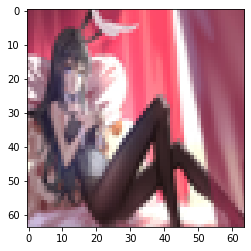

0.99919695


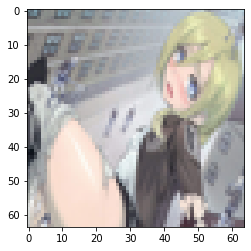

0.92100626


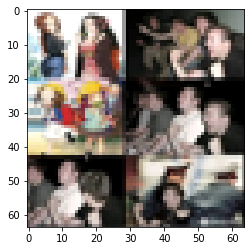

0.78632075


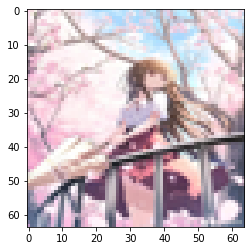

0.9997501


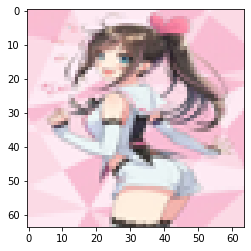

0.67351466


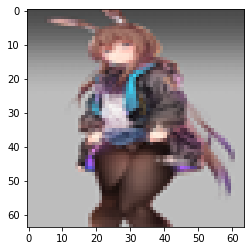

0.96074605


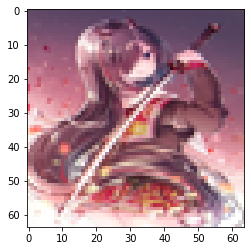

0.9995234


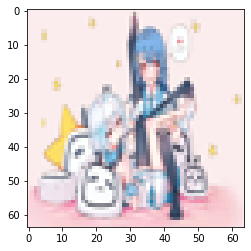

0.99244094


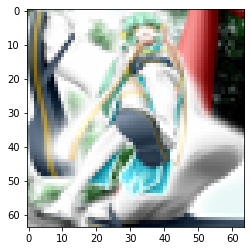

1.0


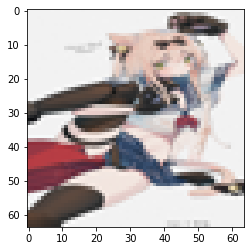

0.9579873


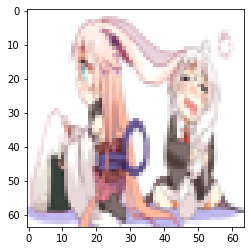

0.99998045


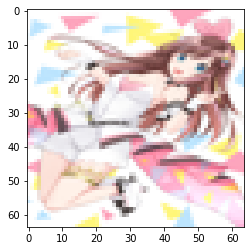

0.9896436


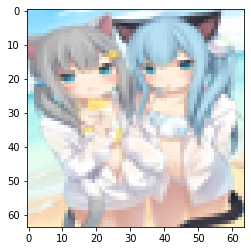

0.99440044


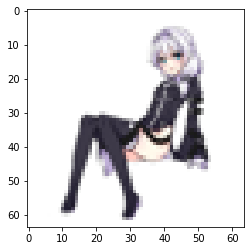

0.9910375


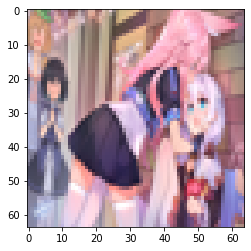

0.9997002


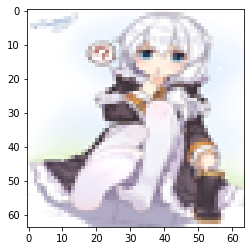

0.999979


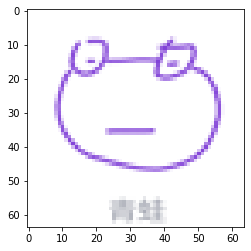

0.957822


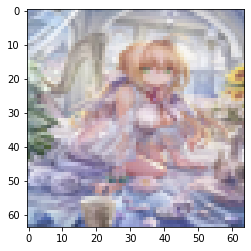

0.94947803


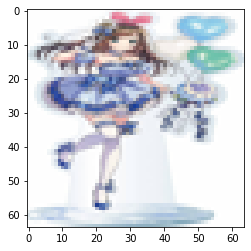

0.8680545


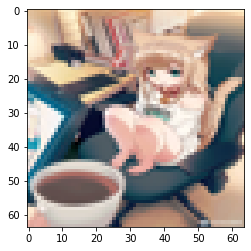

0.9997764


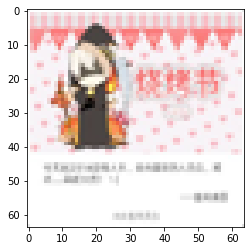

0.9319489


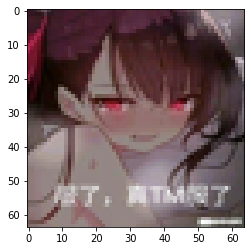

0.88997775


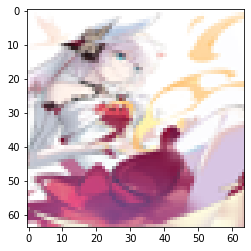

0.90394336


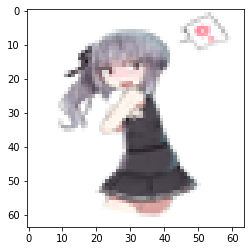

0.9985505


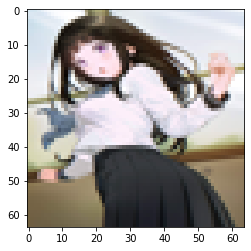

0.9968754


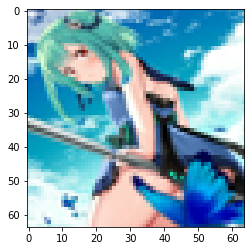

0.8513696


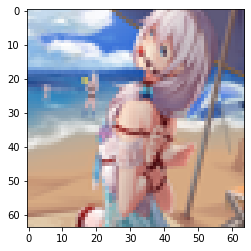

0.67468333


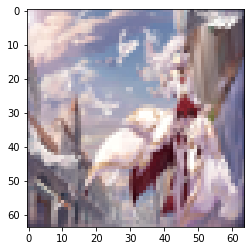

0.9852035


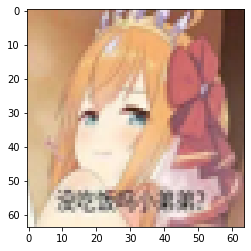

0.93905824


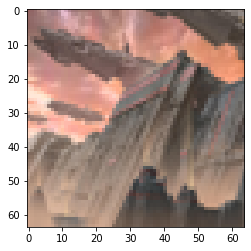

0.9682492


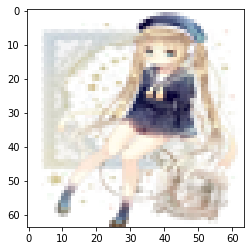

0.97296923


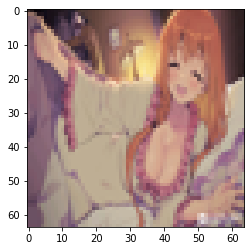

0.9959378


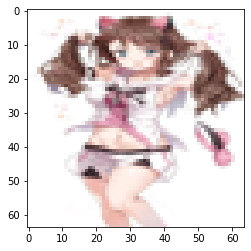

0.99986017


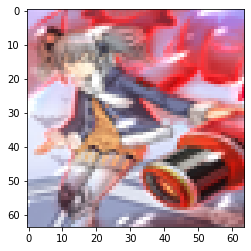

0.9961526


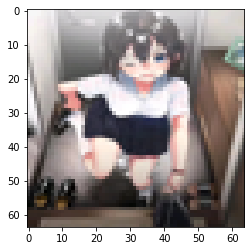

0.99780124


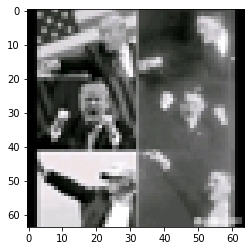

0.9132326


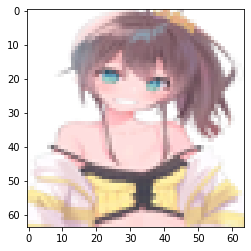

0.999286


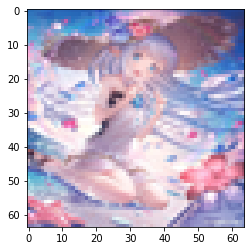

0.81218123


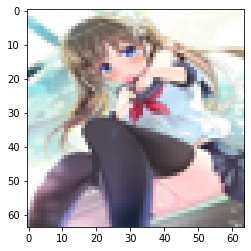

0.5320006


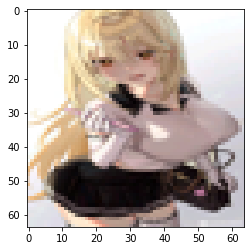

0.9995591


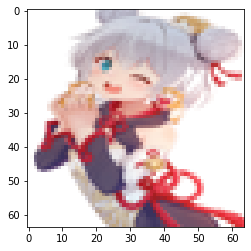

0.9959103


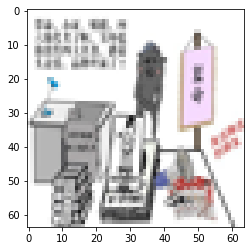

0.9976144


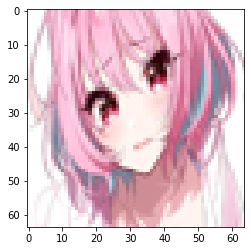

0.99791247


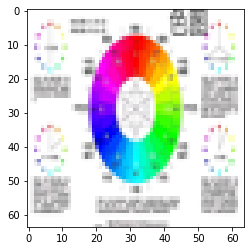

0.942551


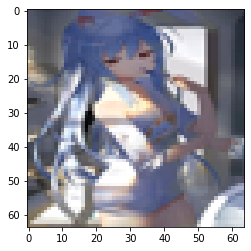

0.99938345


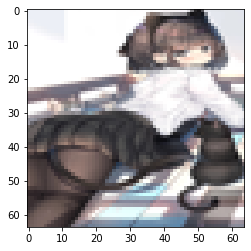

0.99989915


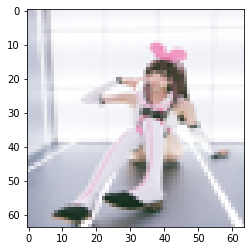

0.95199925


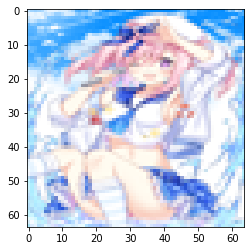

0.9993344


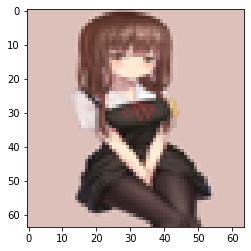

0.9953485


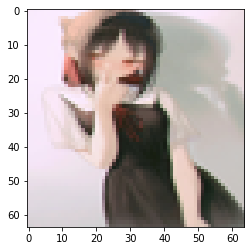

0.9965688


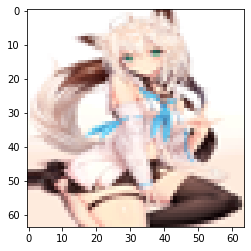

0.99660975


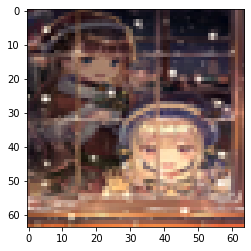

0.5571433


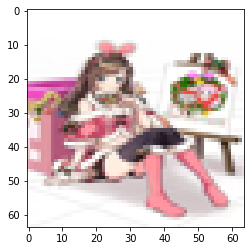

0.9998024


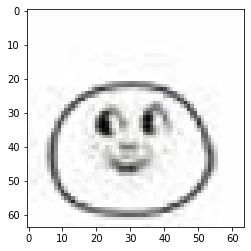

0.99995565


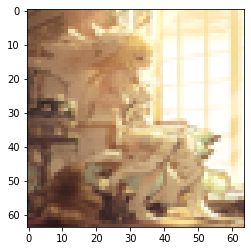

0.94506013


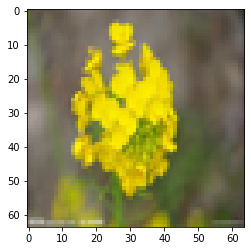

0.8056809


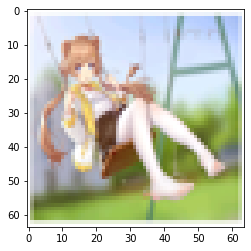

0.9999783


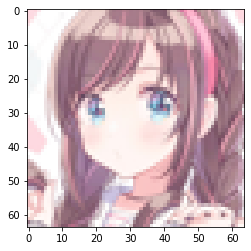

0.90831846


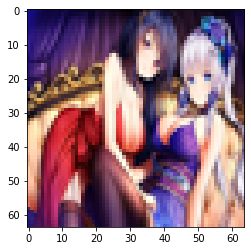

0.9999989


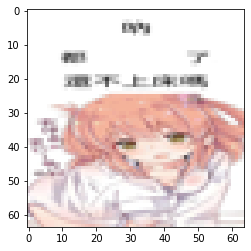

0.83332616


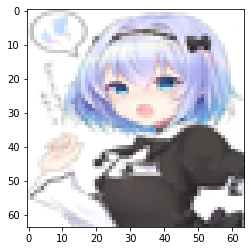

0.985405


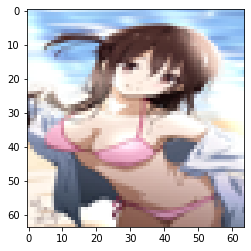

0.75665444


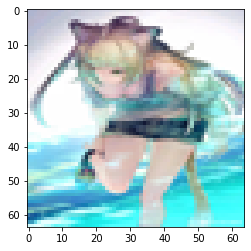

0.99897575


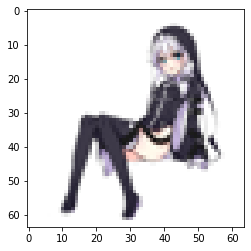

0.9635261


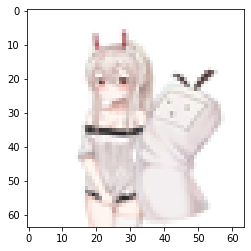

0.99384695


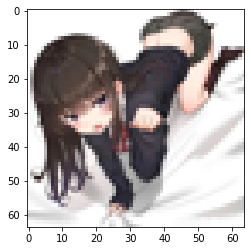

0.99794155


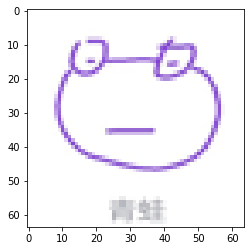

0.9439416


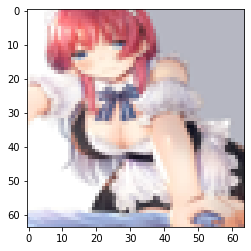

0.9999933


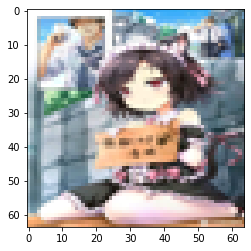

0.9966744


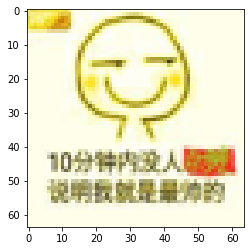

0.95044094


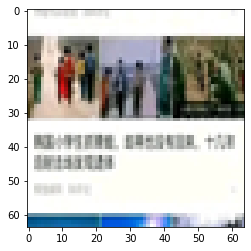

0.88405704


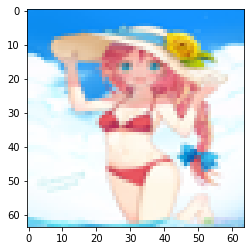

0.9989549


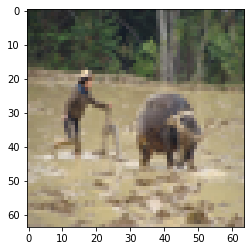

0.65845937


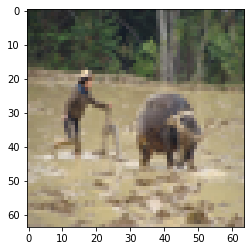

0.65845937


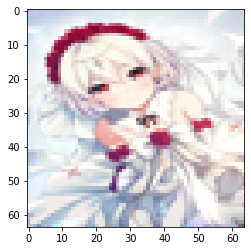

0.9948437


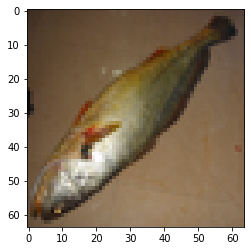

0.995906


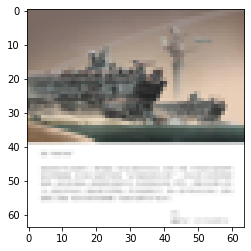

0.98539793


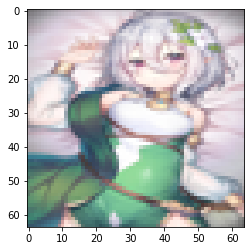

0.95101905


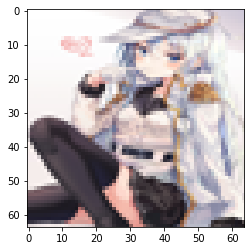

0.99985385


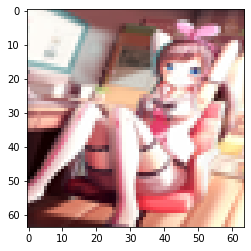

0.94517225


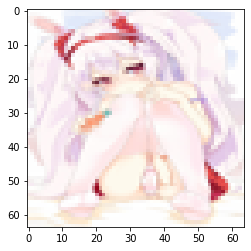

0.97994804


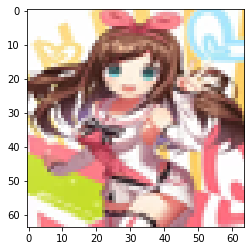

0.8117748


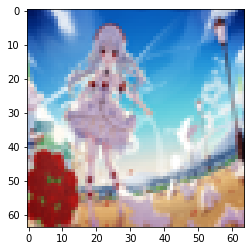

0.99841034


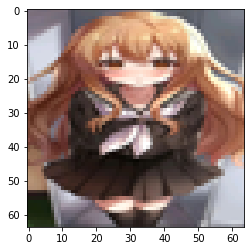

0.9920447


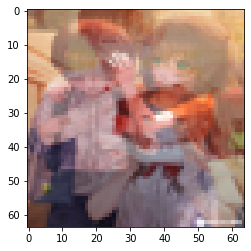

0.9947088


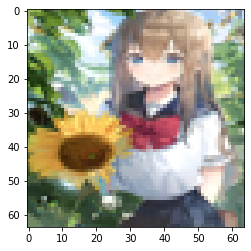

0.8138518


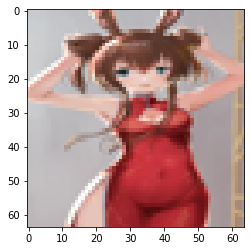

0.9781411


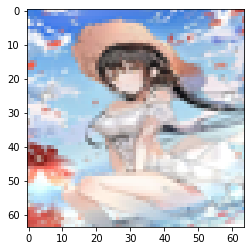

0.9988158


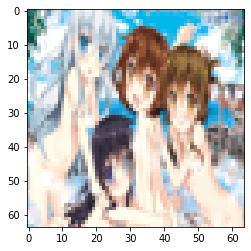

0.9520132


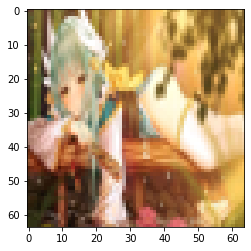

0.63364804


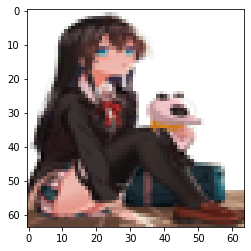

0.8332069


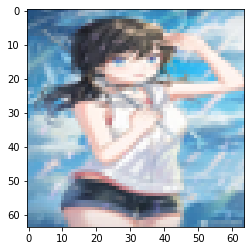

0.99482924


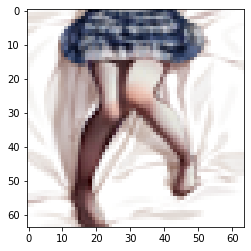

0.9999858


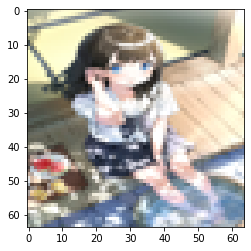

0.9998714


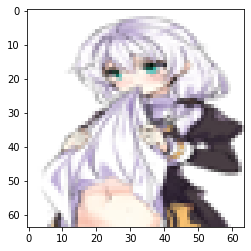

0.9993482


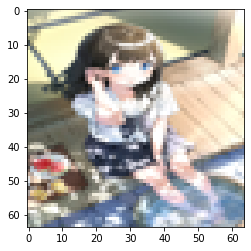

0.9998714


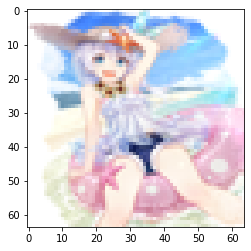

0.8988252


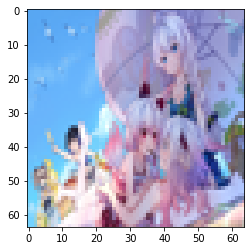

0.9999105


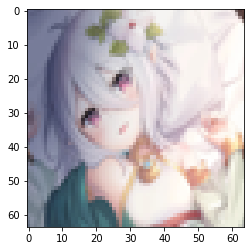

0.93683165


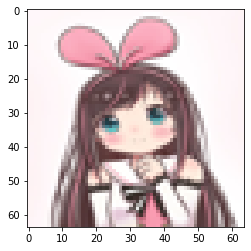

0.99929595


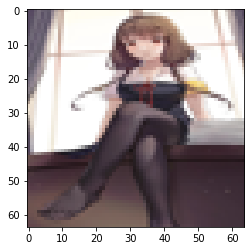

0.50276655


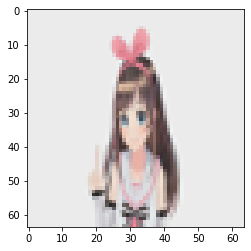

0.9565301


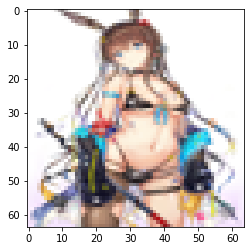

0.99452555


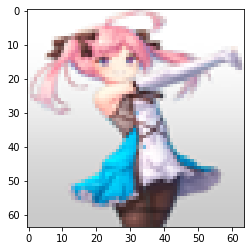

0.9999927


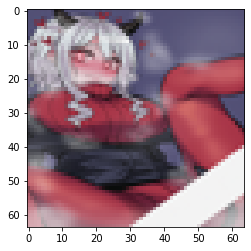

0.99277335


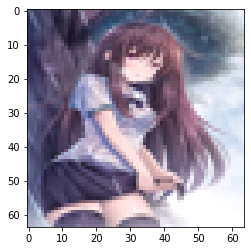

0.9874719


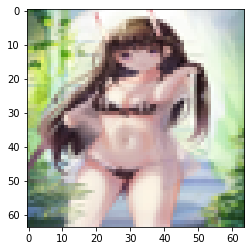

0.99949646


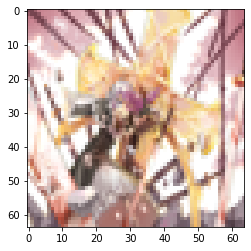

0.99963284


In [5]:
fkpps=200
y_predict=model.predict(test.x[:fkpps])
for i in range(fkpps):
    if y_predict[i][1]>y_predict[i][0]:
        plt.imshow(test.x[i])
        plt.show()
        print(y_predict[i][1])